# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.
Total points 6

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set_theme(style="whitegrid")

In [2]:
from io import BytesIO
from zipfile import ZipFile
import requests
import re

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [3]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [4]:
zipfile.extractall()

In [5]:
! ls ml-latest-small/

README.txt  links.csv  movies.csv  ratings.csv	tags.csv


In [6]:
! head  ./ml-latest-small/movies.csv

**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [7]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Q1 (.25 point) Check if any columns is null

In [8]:
movie.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

# Q 2 (.25 point) Check datatype of columns

In [9]:
movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

# Q3 (.5 point) Using *str* on  series genres, build following  unique_genere set. It should contain all the unique genres from genres column. Print unique genres too.



In [10]:
unique_genre = set(",".join(movie.genres.str.split("|").str.join(",").tolist()).split(","))
unique_genre

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# Q 4 (1 point) build columns for different genres with value True or False based on whether a  genre is present or not in an observation?



In [11]:
for g in unique_genre:
    movie[g] = movie["genres"].str.contains(g)

movie

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,movieId,title,genres,War,Adventure,Comedy,Musical,Film-Noir,(no genres listed),Western,...,Animation,Children,Horror,Documentary,Fantasy,Crime,Action,Drama,Mystery,Romance
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False,True,True,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,5,Father of the Bride Part II (1995),Comedy,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,6,Heat (1995),Action|Crime|Thriller,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
6,7,Sabrina (1995),Comedy|Romance,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,8,Tom and Huck (1995),Adventure|Children,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8,9,Sudden Death (1995),Action,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9,10,GoldenEye (1995),Action|Adventure|Thriller,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# Q5(1 point) Build year column in movie data frame. Year are embedded in title columns




Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [12]:
movie["year"] = movie.title.str.extract(r'\((\d{4})\)')
movie.head()

,movieId,title,genres,War,Adventure,Comedy,Musical,Film-Noir,(no genres listed),Western,...,Children,Horror,Documentary,Fantasy,Crime,Action,Drama,Mystery,Romance,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False,True,True,False,False,False,False,...,True,False,False,True,False,False,False,False,False,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,1995
4,5,Father of the Bride Part II (1995),Comedy,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995


# Q6.(.5 point) Using seaborn, plot a bar plot of frequency number of movies per year. Do you see any trend?


In [13]:
movies_per_year = pd.DataFrame(movie.year.fillna(0).astype(int).value_counts().sort_index())
movies_per_year.columns = ["number"]
movies_per_year.head()

,number
0,13
1902,1
1903,1
1908,1
1915,1


In [14]:
movies_per_year = movies_per_year[movies_per_year.index > 0]
movies_per_year.head(10)

,number
1902,1
1903,1
1908,1
1915,1
1916,4
1917,1
1919,1
1920,2
1921,1
1922,1


In [15]:
"""
keep_cols = movie[movie.columns.difference(["movieId", "genres", "year", "title", "movie_title"])].columns

m = [[col, m_yr, movie[(movie[col]==True)&(movie["year"]==str(m_yr))].movieId.count()]
       for col in keep_cols for m_yr in movie.year.unique()]
m = pd.DataFrame(m, columns=["genre", "year", "avg_num"])
"""

'\nkeep_cols = movie[movie.columns.difference(["movieId", "genres", "year", "title", "movie_title"])].columns\n\nm = [[col, m_yr, movie[(movie[col]==True)&(movie["year"]==str(m_yr))].movieId.count()]\n       for col in keep_cols for m_yr in movie.year.unique()]\nm = pd.DataFrame(m, columns=["genre", "year", "avg_num"])\n'

In [16]:
"""
new_df = pd.DataFrame(columns=keep_cols)
new_df["year"] = m.year.unique()
for y in m.year.unique():
    for g in keep_cols:
        new_df.loc[new_df.year==str(y), str(g)] = m[(m.year==str(y))&(m.genre==g)].avg_num.values
"""

'\nnew_df = pd.DataFrame(columns=keep_cols)\nnew_df["year"] = m.year.unique()\nfor y in m.year.unique():\n    for g in keep_cols:\n        new_df.loc[new_df.year==str(y), str(g)] = m[(m.year==str(y))&(m.genre==g)].avg_num.values\n'

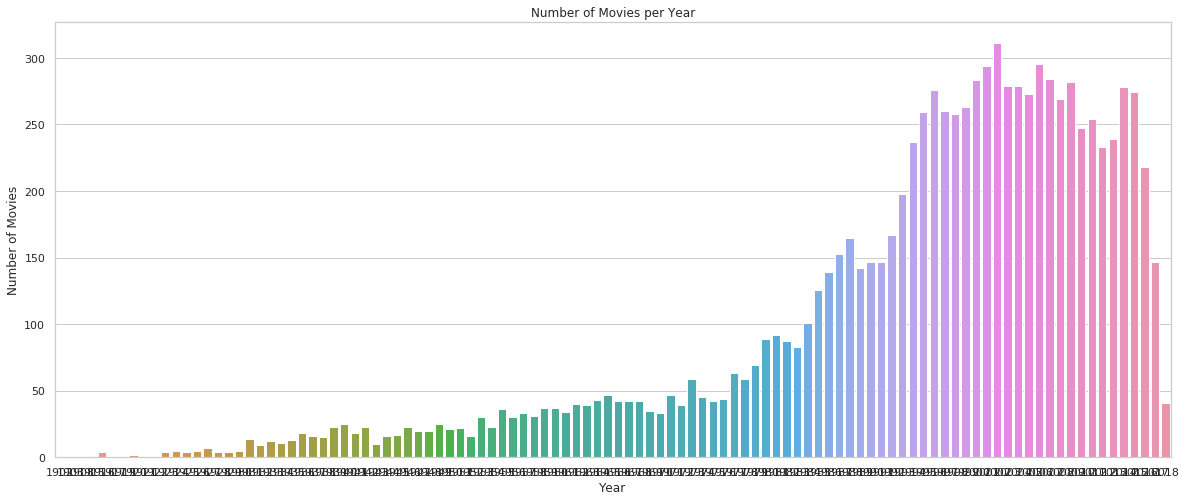

In [17]:
f, ax = plt.subplots(figsize=(20, 8))

sb.set_color_codes("pastel")
sb.barplot(x=movies_per_year.index, y="number", data=movies_per_year)
ax.set(ylabel="Number of Movies",
       xlabel="Year", title="Number of Movies per Year")
plt.show()

# Q7.(1 point) Using matplotlib, plot total number of movies in different genres over the year. Plot should have proper title, axis labels and legends.

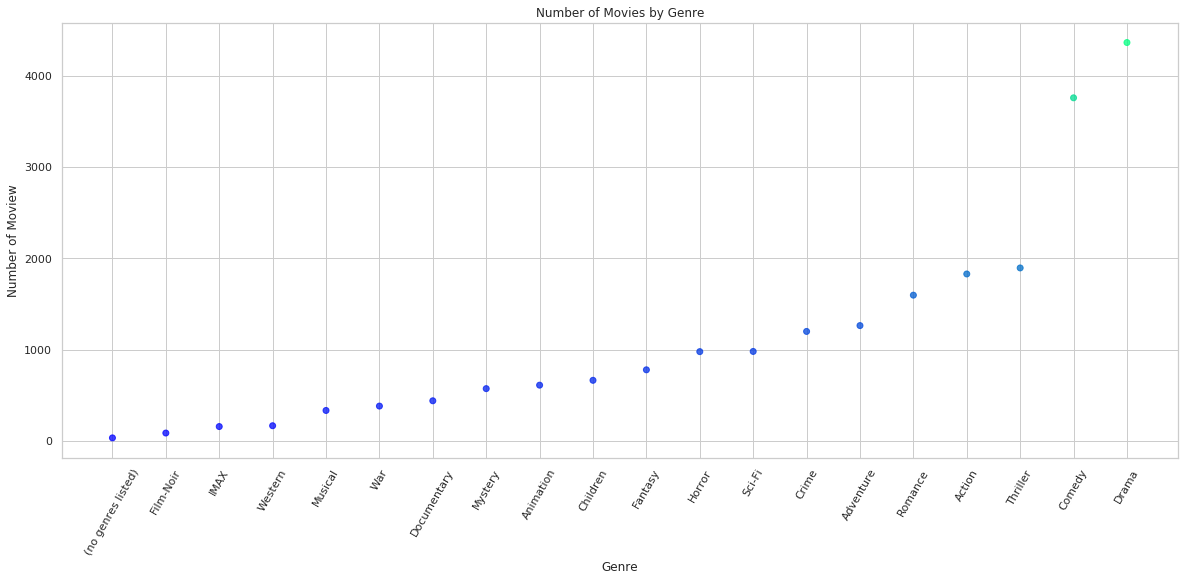

In [18]:
keep_cols = movie[movie.columns.difference(["movieId", "genres", "year", "title", "movie_title"])].columns

movie_genres = pd.DataFrame(movie[keep_cols].sum(axis=0), columns=["number"]).sort_values(by="number")
my_cmap = plt.get_cmap("winter")

plt.subplots(figsize=(20, 8))
plt.scatter(movie_genres.index, movie_genres.number, c=movie_genres.number, cmap=my_cmap, alpha =0.75)
# plt.bar(movie_genres.index, movie_genres.number)
plt.title("Number of Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Moview")
ax = plt.gca()
ax.set_xticklabels(labels=movie_genres.index, rotation=60)
plt.show()

# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie(It should not contain year). Drop the original *title* columns. Display final movie dataFrame too.

In [19]:
movie_copy = movie.copy()
movie["movie_title"] = movie.title.str.replace(r'\((\d{4})\)', '')
movie["movie_title"] = movie["movie_title"].str.strip()
movie.drop(["title"], inplace=True, axis=1)
movie

,movieId,genres,War,Adventure,Comedy,Musical,Film-Noir,(no genres listed),Western,IMAX,...,Horror,Documentary,Fantasy,Crime,Action,Drama,Mystery,Romance,year,movie_title
0,1,Adventure|Animation|Children|Comedy|Fantasy,False,True,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,1995,Toy Story
1,2,Adventure|Children|Fantasy,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,1995,Jumanji
2,3,Comedy|Romance,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,1995,Grumpier Old Men
3,4,Comedy|Drama|Romance,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,1995,Waiting to Exhale
4,5,Comedy,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1995,Father of the Bride Part II
5,6,Action|Crime|Thriller,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,1995,Heat
6,7,Comedy|Romance,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,1995,Sabrina
7,8,Adventure|Children,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1995,Tom and Huck
8,9,Action,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,1995,Sudden Death
9,10,Action|Adventure|Thriller,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,1995,GoldenEye


# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the years in different genres. Write your observation in no more than 2 lines.

In [20]:
genre_cols = movie[movie.columns.difference(["movieId", "genres", "year", "title", "movie_title"])].columns
df = pd.DataFrame([[col, movie[movie[col]==True]
                    .apply(lambda x : 
                           len(x['movie_title'].split(" ")), axis=1)
                    .values.mean()]
                   for col in genre_cols], 
                  columns=["genre", "mean_words_in_title"]).sort_values(by="mean_words_in_title")
df

,genre,mean_words_in_title
17,Thriller,2.869588
10,Film-Noir,2.908046
14,Mystery,3.106457
13,Musical,3.125749
11,Horror,3.147239
8,Drama,3.161202
6,Crime,3.184320
19,Western,3.203593
16,Sci-Fi,3.235714
15,Romance,3.261278


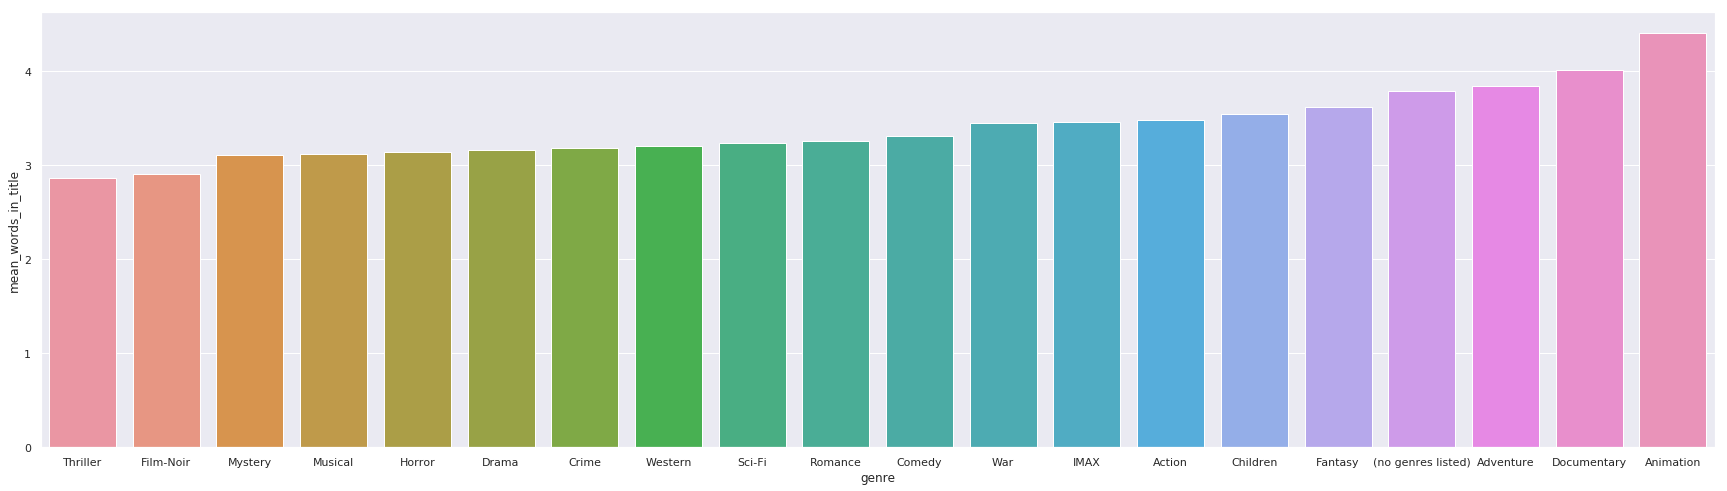

In [21]:
sb.set(rc={"figure.figsize":(30, 8)})
avg_title = sb.barplot(x=df.genre, y=df.mean_words_in_title, data=df)
avg_title.set_xlabel ="Year"
avg_title.set_ylabel = "Average Length of Movie Title"
avg_title.set_title ="Average Length of Movie Title by Year"

Observation goes here.